In [ ]:
prior = 20/80

In [8]:
!which python

//anaconda/bin/python


In [146]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import describe
from scipy.fftpack import dct

### Training Data Injestion

In [6]:
cheeta = loadmat("data/TrainingSamplesDCT_8.mat")

In [7]:
cheeta

{'TrainsampleDCT_BG': array([[  2.79215686e+00,   1.82403883e-01,   8.22381982e-02, ...,
           8.99171356e-04,   8.20162208e-04,   5.56256629e-03],
        [  2.77352941e+00,   1.89948302e-01,   7.13763275e-01, ...,
           8.71660205e-03,   7.92740281e-04,   2.27229935e-03],
        [  2.80147059e+00,   1.74993685e-02,   4.21107915e-02, ...,
           1.37963126e-03,   1.62882836e-03,   2.88076472e-03],
        ..., 
        [  1.85000000e+00,   1.57010159e-01,   1.52944398e-02, ...,
           1.29102016e-03,   6.34867561e-05,   1.92029521e-03],
        [  2.00735294e+00,   6.66499678e-02,   7.33864684e-02, ...,
           2.22899787e-03,   3.96008531e-03,   3.22405038e-04],
        [  2.57205882e+00,   6.14495544e-02,   9.93700379e-02, ...,
           5.52675439e-03,   1.34849406e-03,   9.29894006e-04]]),
 'TrainsampleDCT_FG': array([[  1.62254902e+00,   4.38433862e-01,   1.99470128e-01, ...,
           8.49984789e-03,   3.78270042e-03,   3.02880400e-03],
        [  1.56372

In [9]:
cheeta.keys()

['TrainsampleDCT_FG',
 '__version__',
 'TrainsampleDCT_BG',
 '__header__',
 '__globals__']

In [21]:
TrainsampleDCT_FG = cheeta['TrainsampleDCT_FG']
TrainsampleDCT_BG = cheeta['TrainsampleDCT_BG']

In [29]:
print "BG shape: {}\nFG shape {}\ntype: {}".format(TrainsampleDCT_BG.shape, 
                                                   TrainsampleDCT_FG.shape, 
                                                   type(TrainsampleDCT_BG))

BG shape: (1053, 64)
FG shape (250, 64)
type: <type 'numpy.ndarray'>


### Training Data Histogram & Generating Bin Count Probabilities

<type 'numpy.ndarray'>
16000
Summary Stats: 
DescribeResult(nobs=16000, minmax=(0.0, 3.1387254901960779), mean=0.052550818424827728, variance=0.029996217619030981, skewness=8.053710258097745, kurtosis=75.06687135691573)


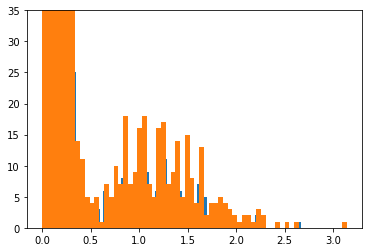

In [129]:
fg = vector_info(TrainsampleDCT_FG) #foreground frequency hist

<type 'numpy.ndarray'>
67392
Summary Stats: 
DescribeResult(nobs=67392, minmax=(0.0, 4.1176470588235281), mean=0.062183293626689437, variance=0.13349717365715991, skewness=8.115502712816335, kurtosis=66.29102494266073)


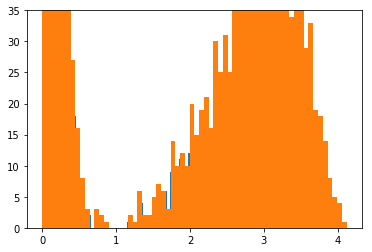

In [130]:
bg = vector_info(TrainsampleDCT_BG) #background frequency hist

In [131]:
fg_bin_prob = [bin_count/sum(fg[0]) for bin_count in fg[0]] #Foreground bin count probabilities w/list comprehension

In [132]:
bg_bin_prob = bg[0]/sum(bg[0]) #Background bin count probabilities w/numpy

In [133]:
bg_prior = 0.6
fg_prior = 0.4

### Cheeta Image Import --> Numpy

In [48]:
rawimage = imread('data/cheetah.bmp', 'L')
print type(rawimage)
print rawimage.shape
print rawimage.size

<type 'numpy.ndarray'>
(255, 270)
68850


In [49]:
rawimage

array([[ 121.,  120.,  111., ...,  142.,  101.,    0.],
       [ 120.,  120.,  115., ...,  137.,  100.,    0.],
       [ 122.,  121.,  118., ...,  131.,   99.,    0.],
       ..., 
       [ 151.,  158.,  161., ...,  140.,  105.,    0.],
       [ 156.,  165.,  172., ...,  134.,  103.,    0.],
       [ 173.,  179.,  192., ...,  129.,  101.,    0.]], dtype=float32)

### Main Classifier Code

In [ ]:
from numpy.lib.stride_tricks import as_strided
a_view = as_strided()


In [ ]:
new_img = np.zeros_like(rawimage) # new_img is a zero filled carbon copy of cheetah.

for patch in rawimage:
    # slicng pattern
    classify_patch(patch,bg_prior,fg_prior,fg_bin_prob,bg_bin_prob)
    
    
#     slice out patch
#     send slice to classifier_function()
#     return classifier decision
#     update new image
#     possibly save new image to folder with iterating number name for view later
#     if end condition:
#         exit
#     else:
#         update corrdinates for slider

# load up new image and see what happened....

# classifier_function():
#     classify the new patch using DCT.

In [65]:
def img_screen(img, block_size, stride=1):
    x, y = block_size
    a_view = as_strided(a, shape=(a.shape[0] - ws[0] + 1, a.shape[1] - ws[1] + 1) + ws, strides=a.strides*2)
    
    
    

In [66]:
img_screen(rawimage, [8,8])

8 8 1


## FUNCTIONS

In [128]:
def vector_info(array):
    flat_array = np.ndarray.flatten(array)
    print type(flat_array)
    print flat_array.size
    print "Summary Stats: \n{}".format(describe(flat_array))
    plt.hist(flat_array,bins=100)
    plt.ylim([0,35])
    (n2, bins2, patches) = plt.hist(flat_array,bins=64)
    return (n2, bins2, patches)

In [ ]:
def classify_patch(patch,bg_prior,fg_prior,fg_bin_prob,bg_bin_prob):
    pass

In [ ]:
class Fg_Bg_Classifier(object):
    """
    doc strings to do...
    """
    
    def __init__(self, bg_prior=0.6,fg_prior=0.4):
        self.bg_prior = bg_prior
        self.fg_prior = fg_prior
    
    def train
    
    
    
    pass